# DANDI Archive - Exploratory Analysis of Dandiset 000945 (AI-Generated)

**Warning:** This notebook was AI-generated with human supervision and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an exploratory analysis of Dandiset 000945, titled "Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation." The dataset contains neural spiking data recorded from the somatosensory cortex of awake rats during transcranial focused ultrasound stimulation (tFUS) experiments. The experiments tested different pulse repetition frequencies (PRFs) of ultrasound stimulation using a 128-element random array ultrasound transducer. Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes.

The notebook will guide you through the following steps:
1.  Loading the Dandiset metadata
2.  Accessing and exploring the NWB file structure
3.  Visualizing electrode positions
4.  Examining sample unit spike times

Before running this notebook, make sure you have the following packages installed:
```bash
pip install dandi lindi pynwb matplotlib seaborn
```

In [1]:
# Load the Dandiset assets using the DANDI API
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

# Print the available assets
for asset in assets:
    print(f"{asset.path}: {asset.identifier}")

sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb: bbd6a696-a68a-4790-820e-02794bd7829d
sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb: d1fa906a-2dc2-4b71-a9e6-26eceafdc21a
sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb: 845dc047-915e-461b-85de-f029b4c8b16f
sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb: 76429bc6-027e-4350-8cf3-e8568db28e58
sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb: 74cb8afa-730d-425b-bf6b-859c04217cac
sub-BH506/sub-BH506_ses-20231026T155106_ecephys.nwb: b353fb55-5a3d-4961-81a2-c121f31c5344
sub-BH498/sub-BH498_ses-20240306T175805_ecephys.nwb: a560cda8-54de-42f6-9c7f-f1b5e6dfb53f
sub-BH506/sub-BH506_ses-20231018T181609_ecephys.nwb: 655fe6cf-a152-412b-9d20-71c6db670629
sub-BH498/sub-BH498_ses-20240306T231317_ecephys.nwb: aff9a3be-9745-4787-b62e-f7028a630daa
sub-BH498/sub-BH498_ses-20240306T184536_ecephys.nwb: f68ae65b-05e1-4ad2-8897-c3374ea65054
sub-BH506/sub-BH506_ses-20231026T172706_ecephys.nwb: 1b696783-c3f6-4dc6-9f4f-1f654a3eb9af
sub-BH506/

## Accessing and Exploring the NWB File

We will access and explore the contents of the NWB file: `sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb`.

This section demonstrates how to load data from the NWB file using `lindi` and `pynwb`. Please note that you should use the `lindi` URL shown below rather than the direct download asset URL.

In [2]:
# Load the NWB file
import pynwb
import lindi

lindi_url = "https://lindi.neurosift.org/dandi/dandisets/000945/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print some information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")

Session description: Awake S1 Stimulation by tFUS
Identifier: BH498_3000_200_anes
Session start time: 2024-03-10 14:37:29-04:00
Subject ID: BH497


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualizing Electrode Positions

This section visualizes the electrode positions in 3D space. The plot shows the spatial arrangement of the electrodes, which can be helpful for understanding the recording setup.

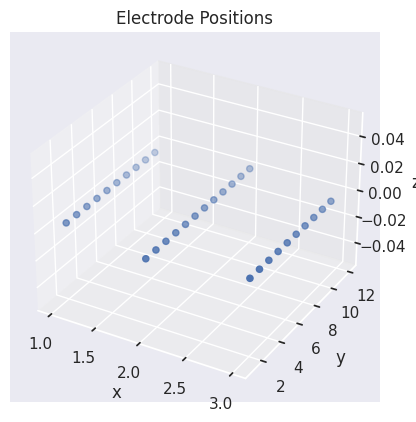

In [3]:
# Get electrode positions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from mpl_toolkits.mplot3d import Axes3D

electrodes = nwb.ec_electrodes
electrode_ids = electrodes["id"].data[:]
x = electrodes["x"].data[:]
y = electrodes["y"].data[:]
z = electrodes["z"].data[:]

# Create a 3D scatter plot of electrode positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Electrode Positions")
plt.show()

## Examining Sample Unit Spike Times

This section displays the spike times for a few sample units. The raster plot shows the temporal distribution of neural spikes, allowing for analysis of firing patterns and synchrony among different units.

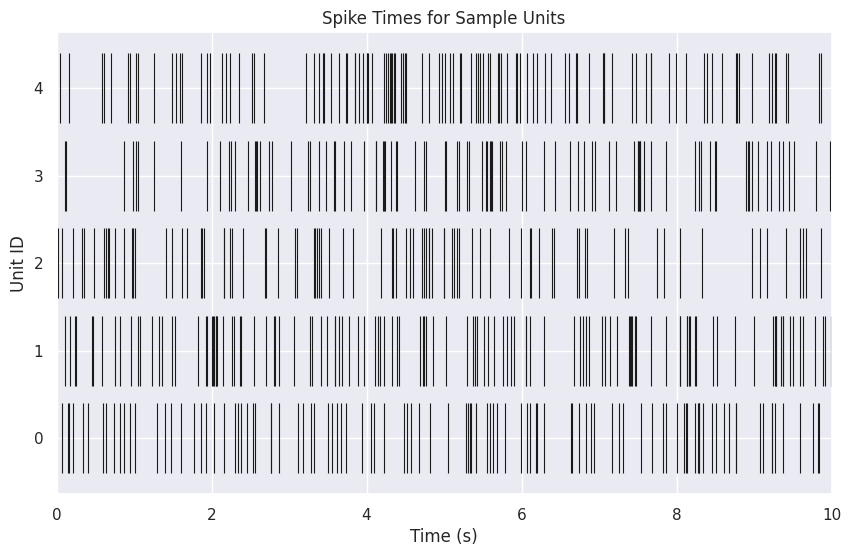

In [4]:
# Get spike times for a few units
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

units = nwb.units
unit_ids = units["id"].data[:]
num_units_to_plot = min(5, len(unit_ids))  # Plot up to 5 units

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
for i in range(num_units_to_plot):
    spike_times = units["spike_times"][i]
    plt.vlines(spike_times, i - 0.4, i + 0.4, color='k', linewidth=0.8)  # Use vlines for clearer spike representation

plt.xlabel("Time (s)")
plt.ylabel("Unit ID")  # Changed ylabel to Unit Number
plt.title("Spike Times for Sample Units")
plt.yticks(range(num_units_to_plot), unit_ids[:num_units_to_plot])  # Use actual unit_ids as y-ticks and ensure they match

plt.xlim(0, 10)  # Limit x-axis to the first 10 seconds for clarity
plt.show()

## Further Analysis

This notebook provides a basic introduction to exploring the Dandiset. Further analysis could include:

*   Analyzing trial-related activity
*   Examining cell type labels
*   Investigating the effects of different PRFs on neural spiking
*   Performing more sophisticated analyses of spike patterns and synchrony